In [151]:
import pandas as pd

In [152]:
df = pd.read_csv("all_adhoc.csv")
df[['date', 'time']] = df['timestamp'].str.split(' ', expand=True)

C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [153]:
df["perma1"] = df["permalink"].str.replace("r/", "")
df["subreddit"] = df["perma1"].str.split('/', expand=True)[1]
df = df.drop(columns=['perma1'])

In [154]:
subs = pd.DataFrame({
    "Subs": df["subreddit"]
})
subs = pd.get_dummies(subs)
subs.head()

,Subs_BidenWatch,Subs_Conservative,Subs_Liberal,Subs_Republican,Subs_benshapiro,Subs_conservatives,Subs_conspiracy,Subs_economy,Subs_politics,Subs_republicans,Subs_worldnews
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [155]:
#for column in subs add to df
for i in subs.columns:
    df[i] = subs[i]

In [156]:
df.describe()

,Unnamed: 0,score,comms_num,created,Subs_BidenWatch,Subs_Conservative,Subs_Liberal,Subs_Republican,Subs_benshapiro,Subs_conservatives,Subs_conspiracy,Subs_economy,Subs_politics,Subs_republicans,Subs_worldnews
count,201718.000000,201718.000000,201718.000000,2.017180e+05,201718.000000,201718.00000,201718.000000,201718.000000,201718.000000,201718.000000,201718.000000,201718.000000,201718.000000,201718.000000,201718.000000
mean,49.455557,1.012403,3.174774,1.644402e+09,0.002479,0.16009,0.003470,0.033710,0.016359,0.043130,0.301227,0.031727,0.126771,0.008923,0.272113
std,28.841194,0.387282,66.520987,1.847487e+06,0.049725,0.36669,0.058806,0.180483,0.126854,0.203149,0.458792,0.175274,0.332717,0.094041,0.445049
min,0.000000,0.000000,0.000000,1.641013e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,0.000000,1.642760e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,0.000000,1.644576e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,1.000000,1.646044e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,135.000000,8461.000000,1.647573e+09,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
#make  a df of the authors
author_df = df.groupby(by ='author', as_index=False).agg({
    "id": "nunique",
    "date": "nunique",
    "Subs_BidenWatch": "sum",
    "Subs_Conservative": "sum",
    "Subs_Liberal": "sum",
    "Subs_Republican": "sum",
    "Subs_benshapiro": "sum",
    "Subs_conservatives": "sum",
    "Subs_conspiracy": "sum",
    "Subs_economy": "sum",
    "Subs_politics": "sum",
    "Subs_republicans": "sum",
    "Subs_worldnews": "sum",
})

In [158]:
author_df["PPD"] = author_df["id"] / author_df["date"]
author_df = author_df.sort_values(by="PPD", ascending=False)
author_df.head(10)

,author,id,date,Subs_BidenWatch,Subs_Conservative,Subs_Liberal,Subs_Republican,Subs_benshapiro,Subs_conservatives,Subs_conspiracy,Subs_economy,Subs_politics,Subs_republicans,Subs_worldnews,PPD
16721,MingWree,190,3,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,190.0,63.333333
44105,saurin212,4396,76,169,1116.0,0,1471.0,174,750.0,0.0,371.0,0.0,345.0,0.0,57.842105
24679,Starlight-786,416,9,0,0.0,0,0.0,1,68.0,167.0,0.0,180.0,0.0,0.0,46.222222
24159,Soberrat2,81,2,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,81.0,40.500000
13379,JihadMeAtHello,282,8,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,282.0,35.250000
13328,JerusalemPost,242,7,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,242.0,34.571429
38567,kibwetie,66,2,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,66.0,33.000000
28441,WhiskeyGentleman,319,10,0,0.0,0,0.0,0,0.0,0.0,0.0,14.0,0.0,305.0,31.900000
37389,iwoelwmn,56,2,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,56.0,28.000000
29461,[deleted],2067,75,0,360.0,8,52.0,5,27.0,243.0,8.0,293.0,3.0,1068.0,27.560000


In [159]:
author_df.columns

Index(['author', 'id', 'date', 'Subs_BidenWatch', 'Subs_Conservative',
       'Subs_Liberal', 'Subs_Republican', 'Subs_benshapiro',
       'Subs_conservatives', 'Subs_conspiracy', 'Subs_economy',
       'Subs_politics', 'Subs_republicans', 'Subs_worldnews', 'PPD'],
      dtype='object')

In [160]:
author_df = author_df.rename(columns={"id":"num_posts", "date":"num_days"})
author_df.head(10)

,author,num_posts,num_days,Subs_BidenWatch,Subs_Conservative,Subs_Liberal,Subs_Republican,Subs_benshapiro,Subs_conservatives,Subs_conspiracy,Subs_economy,Subs_politics,Subs_republicans,Subs_worldnews,PPD
16721,MingWree,190,3,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,190.0,63.333333
44105,saurin212,4396,76,169,1116.0,0,1471.0,174,750.0,0.0,371.0,0.0,345.0,0.0,57.842105
24679,Starlight-786,416,9,0,0.0,0,0.0,1,68.0,167.0,0.0,180.0,0.0,0.0,46.222222
24159,Soberrat2,81,2,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,81.0,40.500000
13379,JihadMeAtHello,282,8,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,282.0,35.250000
13328,JerusalemPost,242,7,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,242.0,34.571429
38567,kibwetie,66,2,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,66.0,33.000000
28441,WhiskeyGentleman,319,10,0,0.0,0,0.0,0,0.0,0.0,0.0,14.0,0.0,305.0,31.900000
37389,iwoelwmn,56,2,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,56.0,28.000000
29461,[deleted],2067,75,0,360.0,8,52.0,5,27.0,243.0,8.0,293.0,3.0,1068.0,27.560000


In [161]:
#Find Anomaies in the Users with some K-Means jawns

In [162]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [163]:
X = author_df.drop(columns=['author', 'PPD', 'num_days'])
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

elbow_data = {"k": range(1, 10), "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7.051512e+07
1,2,3.886807e+07
2,3,2.779354e+07
3,4,1.949738e+07
4,5,1.536679e+07


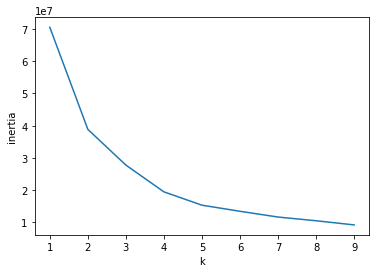

In [164]:
plt.plot(df_elbow.k, df_elbow.inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [165]:
def get_clusters(k, data):
    x = data.drop(columns=['author', 'PPD', 'num_days'])
    model= KMeans(n_clusters=k, random_state=0).fit(x)

    predictions = model.predict(x)
    data["class"] = model.labels_
    return data, predictions

In [168]:
clusters = get_clusters(3, author_df)

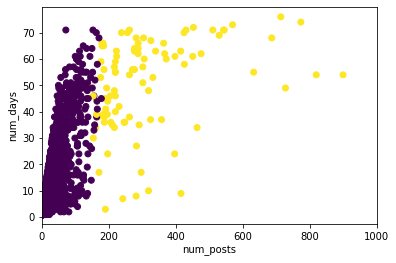

In [169]:
plt.scatter(author_df["num_posts"], author_df["num_days"], c=author_df["class"])
plt.xlabel("num_posts")
plt.ylabel("num_days")
#limit the x and y axis to the range of the data
plt.xlim(0,1000)
plt.show()

In [170]:
#put the new classes back into df
df_with_author_class = pd.merge(df, author_df, on="author")

In [172]:
df_with_author_class.columns

Index(['Unnamed: 0', 'title', 'score', 'id', 'url', 'comms_num', 'created',
       'author', 'author_flair_text', 'permalink', 'timestamp', 'date', 'time',
       'subreddit', 'Subs_BidenWatch_x', 'Subs_Conservative_x',
       'Subs_Liberal_x', 'Subs_Republican_x', 'Subs_benshapiro_x',
       'Subs_conservatives_x', 'Subs_conspiracy_x', 'Subs_economy_x',
       'Subs_politics_x', 'Subs_republicans_x', 'Subs_worldnews_x',
       'num_posts', 'num_days', 'Subs_BidenWatch_y', 'Subs_Conservative_y',
       'Subs_Liberal_y', 'Subs_Republican_y', 'Subs_benshapiro_y',
       'Subs_conservatives_y', 'Subs_conspiracy_y', 'Subs_economy_y',
       'Subs_politics_y', 'Subs_republicans_y', 'Subs_worldnews_y', 'PPD',
       'class'],
      dtype='object')

In [173]:
df_with_author_class = df_with_author_class[['title', 'score', 'id', 'url', 'author', 'author_flair_text', 'permalink', 'timestamp', 'date', 'time','subreddit','class']]

In [175]:
#drop rows with missing title text
df_with_author_class = df_with_author_class.dropna(subset=['title'])

In [176]:
df_with_author_class.to_csv("MLOutputs/all_adhoc_with_class.csv", index=True)